In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv


In [2]:
df = pd.read_csv("../input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv")

In [3]:
# Remove "Height" feature
df = df.drop(["Height"],axis=1)


# 1. Hitung sample mean, sample median, dan sample mode dari data tersebut

In [4]:
# Mean
print("The mean of the weight is :",np.mean(df["Weight"]))

The mean of the weight is : 106.0


In [5]:
# Median

print("The median of the weight is :",np.median(df["Weight"]))

The median of the weight is : 106.0


In [6]:
# Mode
data = df["Weight"]
maxValue = pd.Series.max(data.value_counts())

print("The modus of the weight are : ")
print(data.value_counts()[data.value_counts() == maxValue])

The modus of the weight are : 
104    9
80     9
50     9
Name: Weight, dtype: int64


# 2. Hitung range, sample variance, dan sample standard deviation dari data tersebut.

In [7]:
# Range

print(pd.Series.max(data) - pd.Series.min(data))

110


In [8]:
# Variance
mean = np.mean(data)

variance = (sum((data - mean)**2))/(len(data)-1)
print("Variance of Weight data is " ,variance)

Variance of Weight data is  1048.633266533066


In [9]:
# Standar Deviation
std = variance**0.5

print("Standar deviation of Weight data is" ,std)

Standar deviation of Weight data is 32.38260746964435


# Jelaskan hasil yang didapatkan dari ketiga perhitungan yang ditanyakan.

Dari data kita dapatkan range 110 dimana sudah cukup untuk data berat badan. Juga kita dapatkan nilai variance sekitar 1048,63 dan standar deviasi sekitar 32.38.

# 3. Selain perbedaan di rumus formula, apa perbedaan antara variance dan standard deviation ?

Variance :
1. nilai numerik menggambarkan keragaman dari data secara aritmatika (dibutuhkan untuk model statistika)
2. pangkat 2 dari standar deviasi
3. menunjukkan seberapa jauh persebaran suatu sample di dalam populasi/sample data tersebut.

Standar deviasi : 
1. ukuran dispersi/persebaran data dalam skala data tersebut.
2. akar pangkat 2 dari variance.
3. seberapa jauh persebaran data dari rata-ratanya(mean).


# 4. Hitunglah nilai percentile-15 dan percentile-90 . Apa maksud dari nilai percentile -15 dan percentile -90 untuk data tersebut?

percentile-15 yaitu nilai terendah yang sama atau lebih besar dari 15% data yang ada (terurut). Begitu juga percentile-90, nilai terendah yang sama atau lebih besar dari 90% data yang ada.

In [10]:
# Percentile-15
print("Percentile-15 of the data is:", df.Weight.quantile(0.15))

# Percentile-90
print("Percentile-90 of the data is:", df.Weight.quantile(0.90))

Percentile-15 of the data is: 67.0
Percentile-90 of the data is: 150.10000000000002


# 5. Hitung Interquartile Range (IQR), Reasonable Lower Boundary (RLB), dan Reasonable Upper Boundary (RUB) . Jelaskan apa kegunaan dari ketiga perhitungan di atas.


IQR digunakan untuk menentukan range dari Q1 dan Q3 sehingga menggambarkan ukuran dari penyebaran data.
RLB dan RUB digunakan untuk memperkirakan adanya outliers dari data yang kita punya. Dapat digunakan juga untuk memperkirakan error.

In [11]:
IQR = df.Weight.quantile(0.75) - df.Weight.quantile(0.25)

print("IQR of the Weight data is:",IQR)

RLB = df.Weight.quantile(0.25) - 1.5*IQR
print("RLB of the Weight data is", RLB)

RUB = df.Weight.quantile(0.75) +1.5*IQR
print("RUB of the Weight data is", RUB)


IQR of the Weight data is: 56.0
RLB of the Weight data is -4.0
RUB of the Weight data is 220.0


# 6.Apakah ada outlier pada data tersebut? Jelaskan. Apakah outliers dapat mempengaruhi perhitungan Anda di soal nomor 1 s.d. 2? Berikan alasan.

Tidak ada outliers karena data-data tinggi berada pada rentang 50-160 dan masih pada rentang RLB dan RUB. 
Outliers dapat mempengaruhi soal nomor 1 dan 2, terutama lebih terasa pada nilai-nilai mean, range, variance dan standar deviasi karena akan menjadi lebih tinggi atau lebih rendah dan tidak dapat digunakan untuk merepresentasikan data.

In [12]:
print("Min of Weight data is " ,df["Weight"].min())
print("Max of Weight data is ", df["Weight"].max())

Min of Weight data is  50
Max of Weight data is  160


# 7.Gambarkan box plot . Informasi apa saja yang bisa didapatkan dari menggambar box plot ?

Informasi yang didapat dari boxplot antara lain:
1) Q2 atau median dari data
2) Q1 dan Q3
3) RUB dan RLB dari data
4) Penyebaran(Keragaman) dari data

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb7aacf4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb7aacfb38>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb7aacf320>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb7aae8208>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb7aae8550>],
 'means': []}

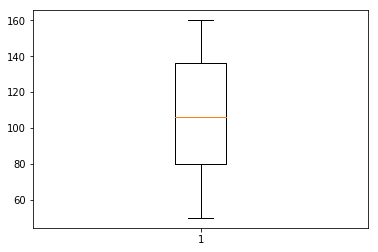

In [13]:
plt.boxplot(df["Weight"])

# 8. Gambarkan Histogram dengan melakukan grouping terhadap data dengan lebar kelas interval 10 dimulai dari nilai 50 (Weight). Anda tidak diwajibkan untuk membuat grouped frequency table .

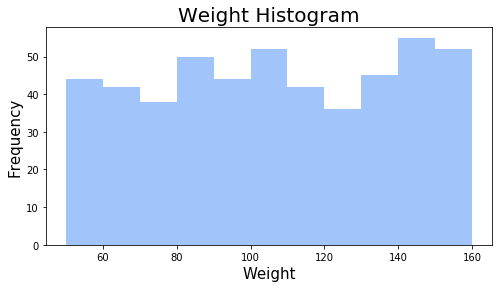

In [14]:
group_num = (max(df["Weight"]) - min(df["Weight"])) // 10

f, ax = plt.subplots(1,1, figsize=(8,4))
ax = sns.distplot(df['Weight'], bins = group_num, color = '#156DF3', kde = False)
plt.ylabel('Frequency', size = 15)
plt.xlabel('Weight', size = 15)
plt.title('Weight Histogram', size = 20)

plt.show()

# 9. Apakah perbedaan antara Histogram dan Bar Graph (min 3)?

Histogram : 
1. Setiap kolom pada histogram mewakili suatu kelompok yang didefinisikan oleh variable kuantitatif dan kontinu.
2. Dengan menggunakan histogram kita dapat melihat kemiringan dari data.
3. Tidak ada gaps di Histogram.
4. Histogram cocok untuk data yang kontinu.

Bar :
1. Setiap kolom pada Bar Graph mewakili suatu kelompok yang didefinisikan oleh variabel kategori.
2. Bar Graph tidak dapat melihat kemiringan dari data.
3. Ada gaps di Bar Graph.
4. Bar Graph cocok untuk tipe data kategorial.

# 10. Buatlah refleksi diri mengenai menggunakan library python dalam membantu pengerjaan tugas PR ini. Refleksi Anda harus memuat apa yang telah kamu pelajari dari tugas ini.

Library-library yang terdapat di Python sangat membantu saya dalam mengerjakan tugas ini,antara lain pandas, numpy, matplotlib dan seaborn.Dari tugas ini saya mempelajari tentang bagaimana mengolah data, melakukan pengambilan data tertentu menggunakan pandas, membuat visualisasi data menggunakan Histogram, Boxplot, ScatterPlot dan lainnnya serta Python dapat melakukan banyak hal lainnya juga.

Python juga sangat membantu dalam hal mengurutkan data dimana jika saya ingin mencari kuartil saya harus mengurutkan data terlebih dahulu secara manual namun dengan menggunakan pandas saya bisa langsung mencari kuartilenya dengan menggunakan method quantile. Terkadang library-library pada python terdapat metode-metode yang tujuannya sama, contohnya jika saya ingin membuat sebuah box-plot kita dapat menggunakan metode boxplot yang terdapat pada package matplotlib atau package panda yang tentu akan menghasilkan box-plot yang sama namun kita dapat melakukan lebih banyak variasi jika menggunakan boxplot dari matplotlib. 

Saya sangat kagum dengan kemudahan-kemudahan yang diberikan oleh library-library python. Saya rasa semua keperluan untuk analisis data telah disediakan dalam library python dengan baik serta dengan adanya jupyter notebook sangat memudahkan Saya untuk ngoding menyelasaikan tugas ini. Untuk mencari mean, median, dll saja seharusnya saya hanya perlu menggunakan method describe untuk mendapatkan gambaran dari data saya. Saya rasa untuk melakukan analisis data dengan python akan sangat menghemat waktu dan tenaga apalagi untuk mengolah data yang berjumalah juta-an bahkan milyaran.  

-terimakasih python.